In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('TelcoCustomer.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.Normalize column TotalCharges













In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(to_replace = ' ', value = np.NaN)
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [7]:
# Normalize Age using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaler.fit(df[['TotalCharges']])



df['Normalized_TotalCharges'] = scaler.transform(df[['TotalCharges']])

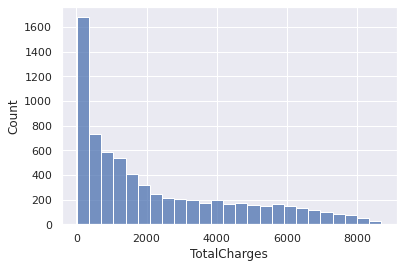

In [8]:
sns.histplot(df['TotalCharges'])

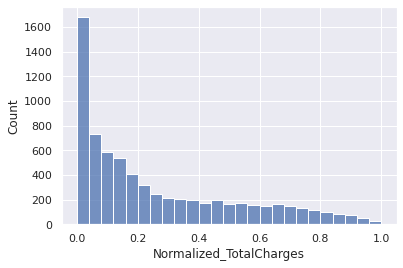

In [9]:
sns.histplot(df['Normalized_TotalCharges'])

In [10]:
df[['TotalCharges', 'Normalized_TotalCharges']].describe()

,TotalCharges,Normalized_TotalCharges
count,7032.000000,7032.000000
mean,2283.300441,0.261309
std,2266.771362,0.261571
min,18.800000,0.000000
25%,401.450000,0.044155
50%,1397.475000,0.159090
75%,3794.737500,0.435719
max,8684.800000,1.000000


2.Standardize column TotalCharges

In [11]:
# Standardize TotalCharges using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['TotalCharges']])

df['Standardized_TotalCharges'] = scaler.transform(df[['TotalCharges']])

In [12]:
df[['TotalCharges', 'Normalized_TotalCharges', 'Standardized_TotalCharges']].describe()

,TotalCharges,Normalized_TotalCharges,Standardized_TotalCharges
count,7032.000000,7032.000000,7.032000e+03
mean,2283.300441,0.261309,7.963545e-17
std,2266.771362,0.261571,1.000071e+00
min,18.800000,0.000000,-9.990692e-01
25%,401.450000,0.044155,-8.302488e-01
50%,1397.475000,0.159090,-3.908151e-01
75%,3794.737500,0.435719,6.668271e-01
max,8684.800000,1.000000,2.824261e+00


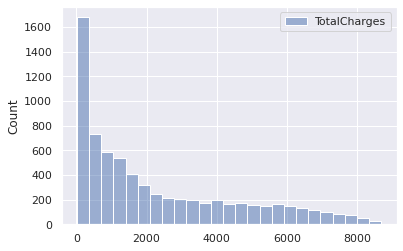

In [13]:
sns.histplot(df[['TotalCharges']])

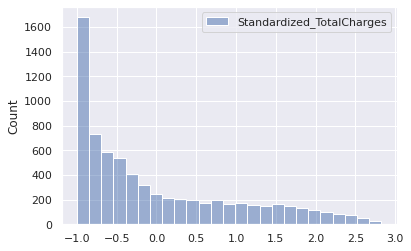

In [14]:
sns.histplot(df[['Standardized_TotalCharges']])

3.Do log transformation for column TotalCharges

In [15]:
temp_df = df[df['TotalCharges'] > 0]

In [16]:
# Log transformation for TotalCharges
temp_df['Log_TotalCharges'] = temp_df['TotalCharges'].transform(np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
temp_df['Log_TotalCharges'].describe()

count    7032.000000
mean        6.939480
std         1.553135
min         2.933857
25%         5.995083
50%         7.242422
75%         8.241371
max         9.069330
Name: Log_TotalCharges, dtype: float64

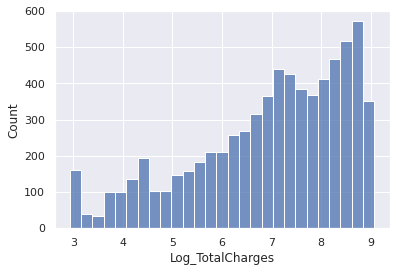

In [18]:
sns.histplot(temp_df['Log_TotalCharges'])

4.Create 1 new feature based on 1 or more initial features

In [39]:
df['Revenue'] = df['Price'] * df['Quantity']

SyntaxError: ignored

In [38]:
features, feature_names = ft.dfs(entityset = es, target_entity = 'clients', 
                                 agg_primitives = ['mean', 'max', 'percent_true', 'last'],
                                 trans_primitives = ['years', 'month', 'subtract', 'divide'])

NameError: ignored

In [ ]:
df['new_feature']

In [ ]:
df.head()

5.Encode InternetService column (assume it has hierarchy)

In [24]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [25]:
# Label encoding for InternetService
def InternetService_grouping(x):
    if x == 'DSL':
        return 3
    elif x == 'Fiber optic':
        return 2
    elif x == 'No':
        return 1
  
    
df['Encoded_InternetService'] = df['InternetService'].apply(InternetService_grouping)


In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Standardized_TotalCharges,Encoded_InternetService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275,-0.994194,3
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0.215867,-0.173740,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310,-0.959649,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241,-0.195248,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330,-0.940457,2


6.Encode PaymentMethod column (assume it doesn't has hierarchy)

In [27]:
# One-Hot Encoding for PaymentMethod
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['PaymentMethod']])

df_encoded = pd.DataFrame(enc.transform(df[['PaymentMethod']]).toarray())
df_encoded.columns = enc.get_feature_names(['PaymentMethod'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
df_encoded

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7038,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,0.0
7041,0.0,0.0,0.0,1.0


In [29]:
df = pd.concat([df, df_encoded], axis=1)

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Standardized_TotalCharges,Encoded_InternetService,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0.001275,-0.994194,3,0.0,0.0,1.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0.215867,-0.173740,3,0.0,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0.010310,-0.959649,3,0.0,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0.210241,-0.195248,3,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0.015330,-0.940457,2,0.0,0.0,1.0,0.0


7.Remove outliers from column TotalCharges (you can choose one method: z-score OR IQR)

In [31]:
# Exclude outliers using z-score
TotalCharges_mean = df['TotalCharges'].mean()
TotalCharges_std = df['TotalCharges'].std()

df[(abs(df['TotalCharges'] - TotalCharges_mean) / TotalCharges_std) < 3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Standardized_TotalCharges,Encoded_InternetService,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0.001275,-0.994194,3,0.0,0.0,1.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0.215867,-0.173740,3,0.0,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0.010310,-0.959649,3,0.0,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0.210241,-0.195248,3,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0.015330,-0.940457,2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,84.80,1990.50,No,0.227521,-0.129180,3,0.0,0.0,0.0,1.0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,103.20,7362.90,No,0.847461,2.241056,2,0.0,1.0,0.0,0.0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,29.60,346.45,No,0.037809,-0.854514,3,0.0,0.0,1.0,0.0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,74.40,306.60,Yes,0.033210,-0.872095,2,0.0,0.0,0.0,1.0



8.Bin column tenure into 3 categories: Low Tenure, Medium Tenure, High Tenure (you can define your own threshold)

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Standardized_TotalCharges,Encoded_InternetService,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0.001275,-0.994194,3,0.0,0.0,1.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0.215867,-0.173740,3,0.0,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0.010310,-0.959649,3,0.0,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0.210241,-0.195248,3,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0.015330,-0.940457,2,0.0,0.0,1.0,0.0


In [33]:
# Categorize tenure
def tenure_cat(x):
    if x <= 20:
        return 'Low Tenure'
    elif x > 30 and x <= 50:
        return 'Medium Tenure'
    elif x > 70:
        return 'High Tenure'
    
df['tenureCategory'] = df['tenure'].apply(tenure_cat)

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Normalized_TotalCharges,Standardized_TotalCharges,Encoded_InternetService,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0.001275,-0.994194,3,0.0,0.0,1.0,0.0,Low Tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,0.215867,-0.173740,3,0.0,0.0,0.0,1.0,Medium Tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,0.010310,-0.959649,3,0.0,0.0,0.0,1.0,Low Tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,0.210241,-0.195248,3,1.0,0.0,0.0,0.0,Medium Tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,0.015330,-0.940457,2,0.0,0.0,1.0,0.0,Low Tenure
